<a href="https://colab.research.google.com/github/Andrius-M/Lithuanian-parlament-votes/blob/master/Votes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


How to import files and run in google colab https://www.youtube.com/watch?v=oqMImCeXi6o


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1Bz3Hn2r4RC7T6Vtqg1GGYXAenkpZLxea'}) # replace the id with id of file you want to access
downloaded.GetContentFile('votes.csv') 

In [ ]:
!ls

adc.json  sample_data  votes.csv


In [ ]:
df = pd.read_csv('votes.csv', low_memory=False)

In [ ]:
#df.describe()

In [ ]:
#df.isnull().any()
#df = df.dropna()
#df.isnull().any()

voting_id            False
voter_id             False
time                 False
group                False
voter                False
question             False
sitting_type         False
vote                 False
n_eligible_voters    False
n_voters             False
dtype: bool

In [ ]:
df['time_yyyy_mm_dd'] = df['time'].str[:10]
df['time_yyyy'] = df['time'].str[:4]

print(type(df))
df = df.sort_values('time_yyyy', ascending=True)
df.head()

<class 'pandas.core.frame.DataFrame'>


,voting_id,voter_id,time,group,voter,question,sitting_type,vote,n_eligible_voters,n_voters,time_yyyy_mm_dd,time_yyyy
2776668,210,7254,1997-10-28 11:12:40,SDF,Valatka Jonas,NaN,rytinis,1.0,136,114,1997-10-28,1997
2776895,214,155,1997-10-28 12:20:47,CF,Glaveckas Kęstutis,NaN,rytinis,1.0,136,67,1997-10-28,1997
2776896,214,101,1997-10-28 12:20:47,TSLK,Hofertienė Romualda,NaN,rytinis,-1.0,136,67,1997-10-28,1997
2776897,214,7266,1997-10-28 12:20:47,TSLK,Jackūnas Žibartas Juozas,NaN,rytinis,-1.0,136,67,1997-10-28,1997
2776898,214,107,1997-10-28 12:20:47,TSLK,Jarmolenko Vladimir,NaN,rytinis,1.0,136,67,1997-10-28,1997


In [ ]:
df_uniq_parties = pd.unique(df['group'])
#print(type(df_uniq_parties))

In [ ]:
df_uniq_voters = pd.unique(df['voter'])
print(df_uniq_voters.shape)
#print(type(df_uniq_voters))
#df_uniq_voters_count = pd.unique(df['voter']).size()
#print(df_uniq_voters_count)

(531,)


In [ ]:
#df_uniq_quest = pd.unique(df['question'])
df_uniq_quest = pd.unique(df['question'])
print(df_uniq_quest.shape)
print(df_uniq_quest[100:105])
print(type(df_uniq_quest))
#print(df_uniq_voters[1:100])

(11647,)
['dėl pasiūlymo paskirti Biudžeto ir finansų komitetą papildomu komitetu šiems projektams svarstyti'
 'dėl pritarimo opozicinės  frakcijos „Tvarka ir teisingumas“ pasiūlymui daryti pertrauką iki kito posėdžio'
 'dėl pritarimo patikslintai darbotvarkei' 'dėl pritarimo darbotvarkei'
 'dėl pritarimo Respublikos Prezidento pasiūlymui šį projektą svarstyti ypatingos skubos tvarka']
<class 'numpy.ndarray'>


In [ ]:
df.head(11)

,voting_id,voter_id,time,group,voter,question,sitting_type,vote,n_eligible_voters,n_voters,time_yyyy_mm_dd,time_yyyy
0,-26066,79161,2017-05-04 10:05:43,LVŽSF,Ačienė Vida,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
1,-26066,48690,2017-05-04 10:05:43,TS-LKDF,Adomėnas Mantas,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
2,-26066,79162,2017-05-04 10:05:43,LSF,Alekna Virgilijus,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
3,-26066,79163,2017-05-04 10:05:43,TTF,Andrikis Rimas,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
4,-26066,79164,2017-05-04 10:05:43,LSF,Armonaitė Aušrinė,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
5,-26066,7208,2017-05-04 10:05:43,TS-LKDF,Ažubalis Audronius,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
6,-26066,79166,2017-05-04 10:05:43,LVŽSF,Bacvinka Kęstutis,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
7,-26066,34360,2017-05-04 10:05:43,TTF,Bartkevičius Kęstutis,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
8,-26066,26656,2017-05-04 10:05:43,LVŽSF,Baškienė Rima,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017
9,-26066,38418,2017-05-04 10:05:43,LSF,Baublys Juozas,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106,2017-05-04,2017


time_yyyy
1997     7
1998     7
1999    10
2000    17
2001     7
2002     9
2003    10
2004    10
2005    10
2006    12
2007    11
2008    13
2009    10
2010    11
2011     9
2012    10
2013     8
2014     8
2015     7
2016     9
Name: group, dtype: int64


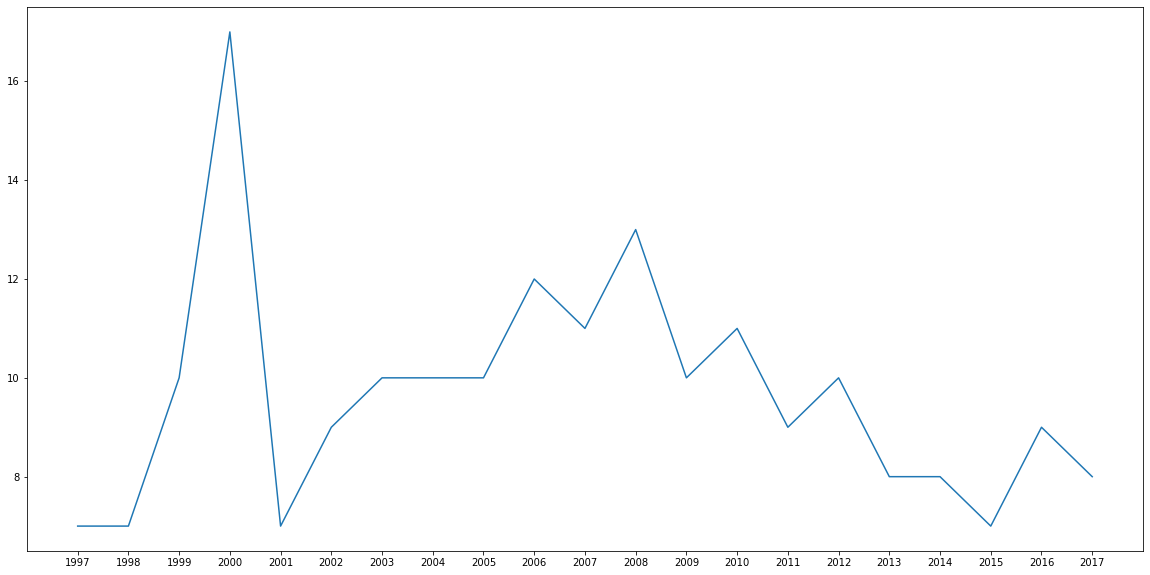

In [ ]:
#
q_df = df
q_df = df.groupby('time_yyyy')['group'].nunique()

print(q_df.head(20))

plt.figure(figsize=(20,10))
plt.title("")
plt.xlabel("")
plt.ylabel("")
sns.lineplot(data=q_df, label='')

In [ ]:
#sitting_type - one of:
#rytinis - in the morning
#vakarinis - in the evening
#neeilinis - additional sitting ????????????????
#nenumatytas - not planned ??????????????

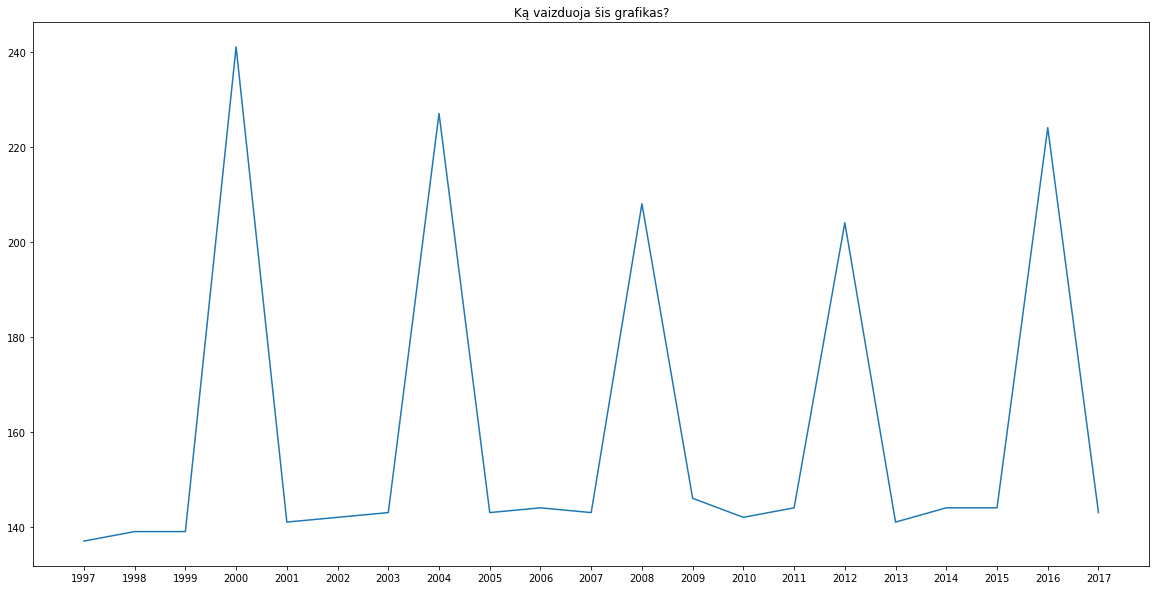

In [ ]:
# Riddle
q_df = df
q_df = df.groupby('time_yyyy')['voter'].nunique()
#print(q_df.head(20))

plt.figure(figsize=(20,10))
plt.title("Ką vaizduoja šis grafikas?")
plt.xlabel("")
plt.ylabel("")
sns.lineplot(data=q_df, label='')

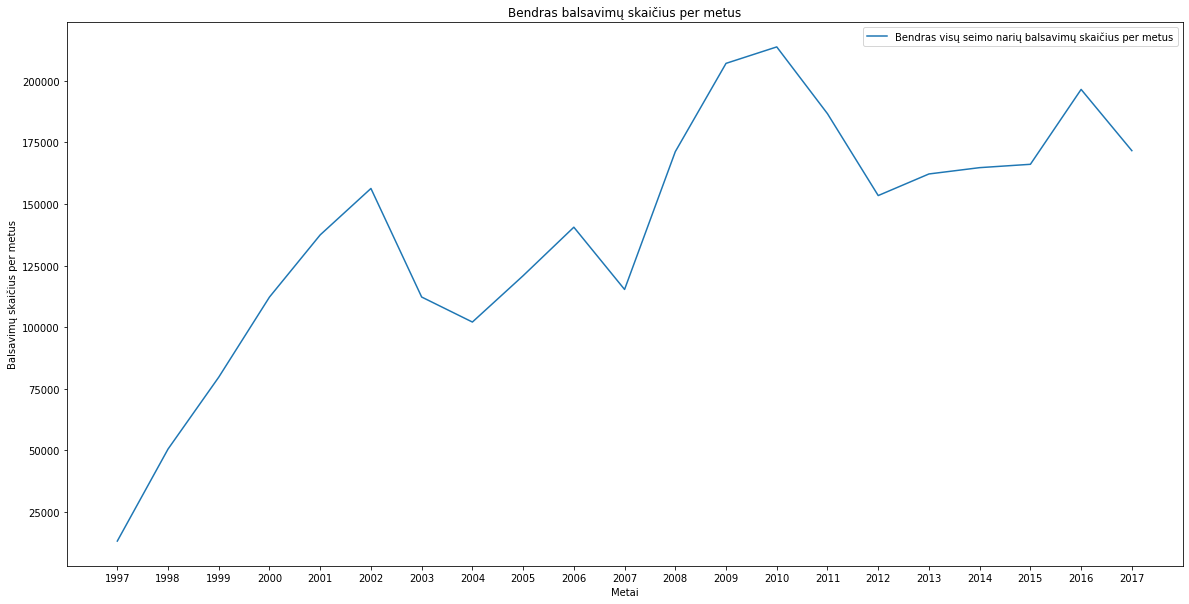

In [ ]:
votes = df.groupby('time_yyyy').voter.count()

plt.figure(figsize=(20,10))
plt.title("Bendras balsavimų skaičius per metus")
plt.xlabel("Metai")
plt.ylabel("Balsavimų skaičius per metus")
sns.lineplot(data=votes, label='Bendras visų seimo narių balsavimų skaičius per metus')

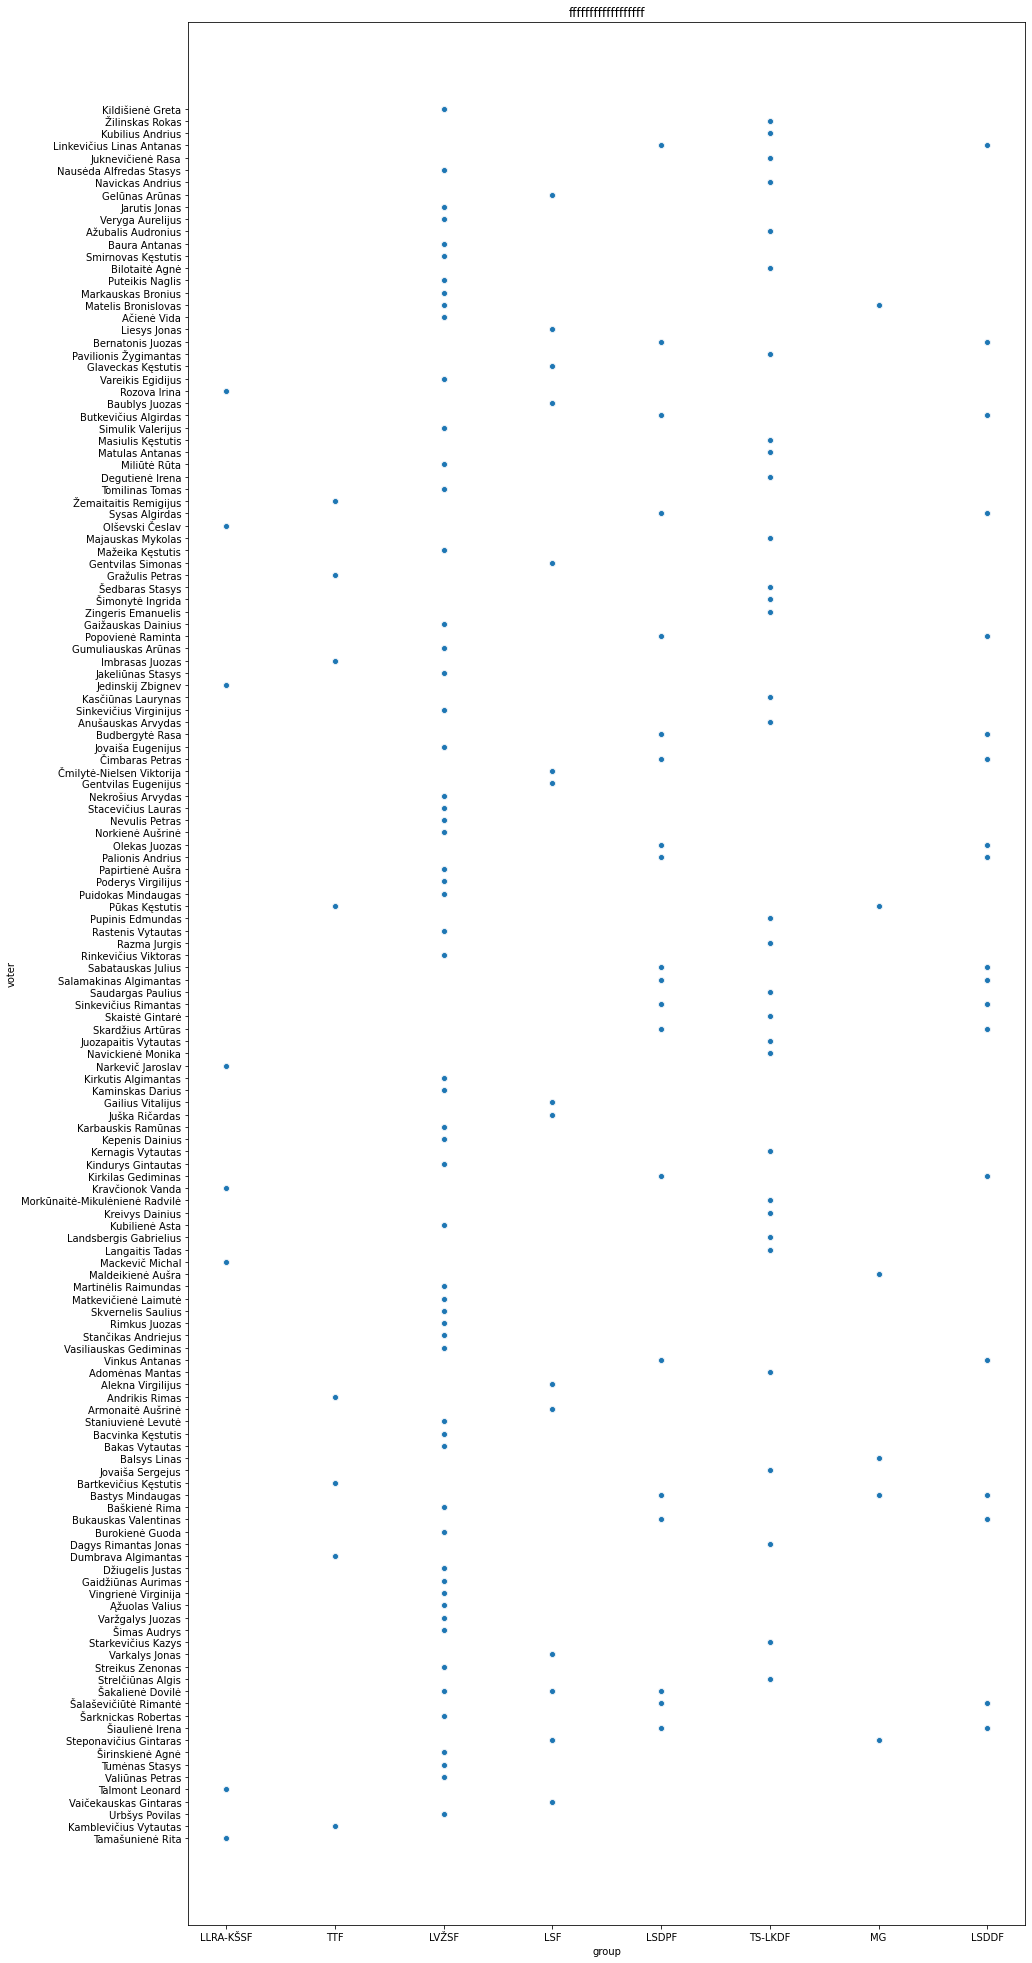

In [ ]:
df_scatter = df.where(df['time_yyyy'] == '2017')
df_scatter.head()
#sns.scatterplot(x=df_scatter['voter'], y=df_scatter['group'])
plt.figure(figsize=(15,35))
plt.title("ffffffffffffffffff")
plt.xlabel("dddddddddddddddd")
plt.ylabel("bbbbbbbbbbbbbbb")
sns.scatterplot(x=df_scatter['group'], y=df_scatter['voter'])

In [ ]:
#['Salamakinas Algimantas', 'Degutienė Irena', 'Gražulis Petras', 'Glaveckas Kęstutis', 'Razma Jurgis', 'Olekas Juozas', 'Butkevičius Algirdas', 'Sysas Algirdas', 'Šiaulienė Irena', 'Kirkilas Gediminas', 'Kubilius Andrius']

members1 = list(['Salamakinas Algimantas', 'Degutienė Irena', 'Gražulis Petras', 'Glaveckas Kęstutis', 'Razma Jurgis', 'Olekas Juozas', 'Butkevičius Algirdas', 'Sysas Algirdas', 'Šiaulienė Irena', 'Kirkilas Gediminas', 'Kubilius Andrius'])
#members1 = list(['Razma Jurgis', 'Šiaulienė Irena', 'Sysas Algirdas', 'Matulas Antanas', 'Čigriejienė Vida Marija', 'Dagys Rimantas Jonas', 'Dumčius Arimantas', 'Degutienė Irena', 'Žakaris Edvardas', 'Kuzminskas Kazimieras', 'Saulis Vytautas', 'Sabatauskas Julius', 'Salamakinas Algimantas', 'Baškienė Rima', 'Aleknaitė Abramikienė Vilija', 'Steponavičius Gintaras', 'Dumbrava Algimantas', 'Kupčinskas Rytas', 'Žeimys Pranas', 'Margevičienė Vincė Vaidevutė'])
#members1 = list(['Landsbergis Gabrielius'])

df1 = pd.DataFrame()
all = pd.DataFrame()
for i in members1:
  df1[i] = df[df['voter'] == i].groupby(['time_yyyy']).size()#.reset_index(name='voter')
  all = all.append(df1[i], ignore_index=True)

all['vardai'] = members
all.reset_index()

,index,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,vardai
0,0,130.0,357.0,478.0,650.0,856.0,1186.0,914.0,792.0,722.0,790.0,762.0,1068.0,1017.0,1306.0,1362.0,1158.0,911.0,887.0,842.0,1091.0,1082.0,Salamakinas Algimantas
1,1,44.0,103.0,155.0,310.0,908.0,1023.0,626.0,845.0,959.0,967.0,712.0,1390.0,1628.0,1529.0,1248.0,1180.0,1080.0,1067.0,1116.0,1394.0,1183.0,Degutienė Irena
2,2,96.0,307.0,565.0,635.0,597.0,582.0,538.0,449.0,538.0,638.0,642.0,1005.0,1053.0,940.0,1046.0,843.0,1162.0,1161.0,1007.0,1035.0,981.0,Gražulis Petras
3,3,58.0,186.0,387.0,511.0,786.0,464.0,666.0,582.0,772.0,833.0,655.0,1042.0,1231.0,1033.0,890.0,634.0,490.0,548.0,610.0,645.0,676.0,Glaveckas Kęstutis
4,4,139.0,544.0,886.0,956.0,1090.0,1131.0,806.0,845.0,982.0,1159.0,1036.0,1420.0,1966.0,2097.0,1863.0,1466.0,1424.0,1587.0,1485.0,1628.0,1426.0,Razma Jurgis
5,5,31.0,134.0,439.0,514.0,872.0,971.0,238.0,234.0,701.0,647.0,336.0,791.0,1076.0,1189.0,988.0,827.0,536.0,482.0,519.0,1050.0,1090.0,Olekas Juozas
6,6,93.0,269.0,498.0,704.0,1090.0,1183.0,998.0,471.0,556.0,545.0,194.0,442.0,661.0,767.0,799.0,537.0,192.0,168.0,181.0,534.0,824.0,Butkevičius Algirdas
7,7,132.0,316.0,730.0,998.0,1199.0,1470.0,1043.0,954.0,1085.0,1315.0,1061.0,1416.0,1673.0,1808.0,1478.0,1386.0,1198.0,1317.0,1245.0,1380.0,1096.0,Sysas Algirdas
8,8,140.0,422.0,676.0,784.0,1098.0,1490.0,1307.0,1161.0,901.0,1150.0,1171.0,1592.0,1646.0,1476.0,1471.0,1174.0,1588.0,1545.0,1666.0,1880.0,1137.0,Šiaulienė Irena
9,9,31.0,239.0,323.0,502.0,553.0,593.0,401.0,260.0,67.0,63.0,134.0,248.0,704.0,921.0,1018.0,674.0,680.0,760.0,761.0,1049.0,699.0,Kirkilas Gediminas


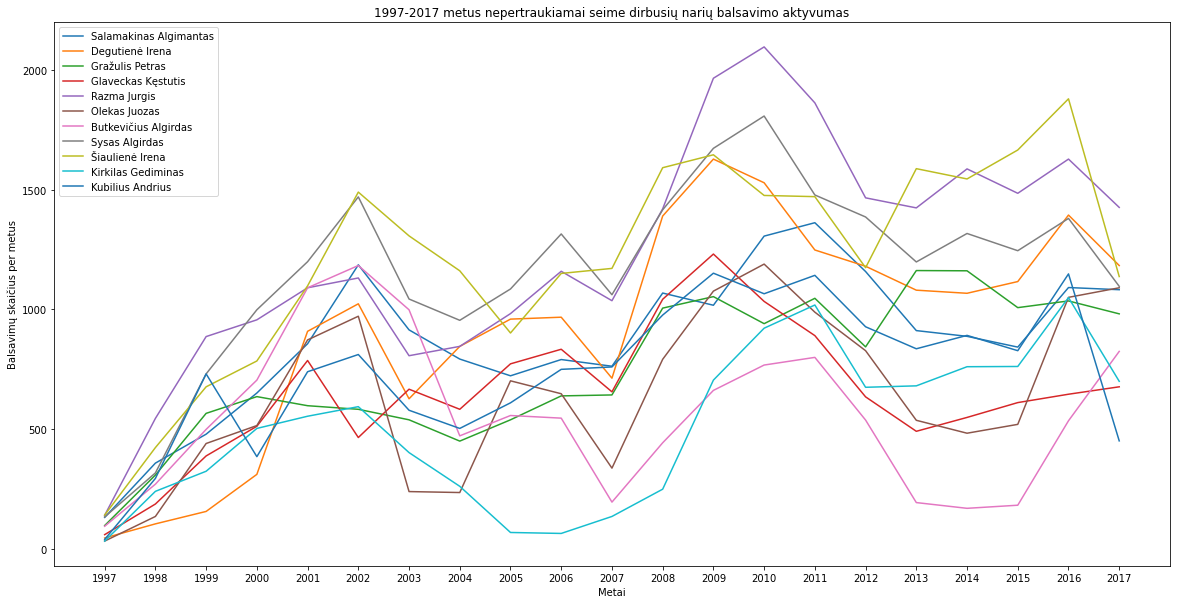

In [ ]:
plt.figure(figsize=(20,10))
plt.title("1997-2017 metus nepertraukiamai seime dirbusių narių balsavimo aktyvumas")
plt.xlabel("Metai")
plt.ylabel("Balsavimų skaičius per metus")

all_1 = all.drop(columns='vardai') #pasidarom DataFrame'ą tik iš skaičių išmesdami stulpelį 'vardai'

for i in range(len(all)):
  sns.lineplot(data=all_1.iloc[i], label=all.iloc[i]['vardai'])


In [ ]:
total_votes = all
total_votes.set_index('vardai', inplace=True)
total_votes['Total'] = all.sum(axis=1)
total_votes.head(11)

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
vardai,,,,,,,,,,,,,,,,,,,,,,
Salamakinas Algimantas,130.0,357.0,478.0,650.0,856.0,1186.0,914.0,792.0,722.0,790.0,762.0,1068.0,1017.0,1306.0,1362.0,1158.0,911.0,887.0,842.0,1091.0,1082.0,18361.0
Degutienė Irena,44.0,103.0,155.0,310.0,908.0,1023.0,626.0,845.0,959.0,967.0,712.0,1390.0,1628.0,1529.0,1248.0,1180.0,1080.0,1067.0,1116.0,1394.0,1183.0,19467.0
Gražulis Petras,96.0,307.0,565.0,635.0,597.0,582.0,538.0,449.0,538.0,638.0,642.0,1005.0,1053.0,940.0,1046.0,843.0,1162.0,1161.0,1007.0,1035.0,981.0,15820.0
Glaveckas Kęstutis,58.0,186.0,387.0,511.0,786.0,464.0,666.0,582.0,772.0,833.0,655.0,1042.0,1231.0,1033.0,890.0,634.0,490.0,548.0,610.0,645.0,676.0,13699.0
Razma Jurgis,139.0,544.0,886.0,956.0,1090.0,1131.0,806.0,845.0,982.0,1159.0,1036.0,1420.0,1966.0,2097.0,1863.0,1466.0,1424.0,1587.0,1485.0,1628.0,1426.0,25936.0
Olekas Juozas,31.0,134.0,439.0,514.0,872.0,971.0,238.0,234.0,701.0,647.0,336.0,791.0,1076.0,1189.0,988.0,827.0,536.0,482.0,519.0,1050.0,1090.0,13665.0
Butkevičius Algirdas,93.0,269.0,498.0,704.0,1090.0,1183.0,998.0,471.0,556.0,545.0,194.0,442.0,661.0,767.0,799.0,537.0,192.0,168.0,181.0,534.0,824.0,11706.0
Sysas Algirdas,132.0,316.0,730.0,998.0,1199.0,1470.0,1043.0,954.0,1085.0,1315.0,1061.0,1416.0,1673.0,1808.0,1478.0,1386.0,1198.0,1317.0,1245.0,1380.0,1096.0,24300.0
Šiaulienė Irena,140.0,422.0,676.0,784.0,1098.0,1490.0,1307.0,1161.0,901.0,1150.0,1171.0,1592.0,1646.0,1476.0,1471.0,1174.0,1588.0,1545.0,1666.0,1880.0,1137.0,25475.0


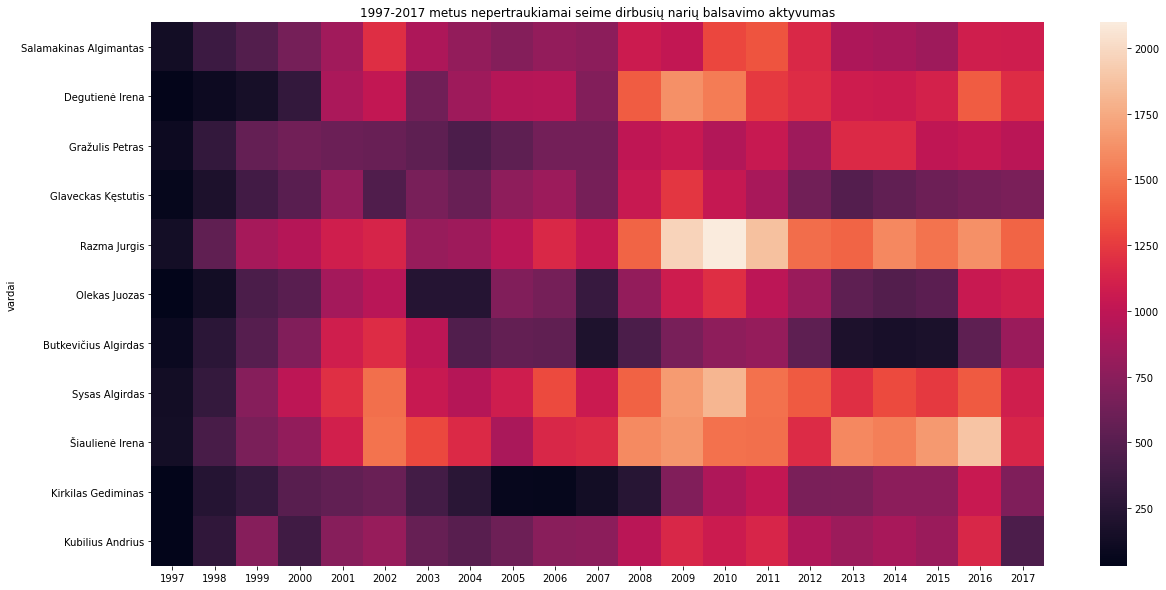

In [ ]:
votes1 = total_votes.drop(columns='Total') 
plt.figure(figsize=(20,10))
plt.title("1997-2017 metus nepertraukiamai seime dirbusių narių balsavimo aktyvumas")
plt.xlabel("Metai")
plt.ylabel("Balsavimų skaičius per metus")
sns.heatmap(data=votes1, annot=False)

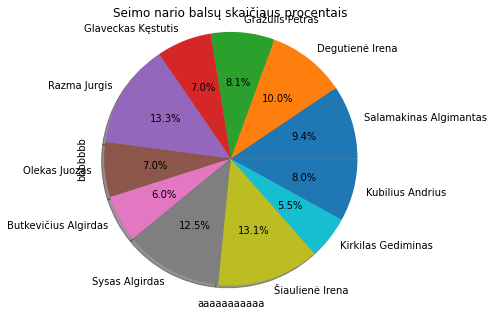

In [ ]:
sizes = total_votes['Total']
sizes_df = pd.DataFrame({'voter':sizes.index, 'Total':sizes.values})

#plt.figure(figsize=(20,10))
#plt.title("1997-2017 metus nepertraukiamai seime dirbusių narių balsavimo aktyvumas")
#plt.xlabel("Metai")
#plt.ylabel("Balsavimų skaičius per metus")

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=sizes_df['voter'], autopct='%1.1f%%', shadow=True)
fig1.set_size_inches(5,5)
ax1.axis('equal')
ax1.set_xlabel('aaaaaaaaaaa')
ax1.set_ylabel('bbbbbbb')
ax1.set_title('Seimo nario balsų skaičiaus procentais')

plt.show()

In [ ]:
df.head()
voters_votes = df.groupby('voter').vote.count()
voters_votes = pd.DataFrame({'voter':voters_votes.index, 'count':voters_votes.values})
voters_votes = voters_votes.sort_values('count', ascending=False)
voters_votes.head(20)

members1 = voters_votes['voter'][:20]
print(list(members1))
### ['Razma Jurgis', 'Šiaulienė Irena', 'Sysas Algirdas', 'Matulas Antanas', 'Čigriejienė Vida Marija', 'Dagys Rimantas Jonas', 'Dumčius Arimantas', 'Degutienė Irena', 'Žakaris Edvardas', 'Kuzminskas Kazimieras', 'Saulis Vytautas', 'Sabatauskas Julius', 'Salamakinas Algimantas', 'Baškienė Rima', 'Aleknaitė Abramikienė Vilija', 'Steponavičius Gintaras', 'Dumbrava Algimantas', 'Kupčinskas Rytas', 'Žeimys Pranas', 'Margevičienė Vincė Vaidevutė']

#plt.figure(figsize=(20,10))
#plt.title("fffffffffffffffffffff")
#plt.xlabel("dddd")
#plt.ylabel("llllllllll llll ll")

#voters_votes = all.drop(columns='vardai') #pasidarom DataFrame'ą tik iš skaičių išmesdami stulpelį 'vardai'

#for i in range(len(voters_votes)):
#  sns.lineplot(data=all_1.iloc[i], label=all.iloc[i]['vardai'])

['Razma Jurgis', 'Šiaulienė Irena', 'Sysas Algirdas', 'Matulas Antanas', 'Čigriejienė Vida Marija', 'Dagys Rimantas Jonas', 'Dumčius Arimantas', 'Degutienė Irena', 'Žakaris Edvardas', 'Kuzminskas Kazimieras', 'Saulis Vytautas', 'Sabatauskas Julius', 'Salamakinas Algimantas', 'Baškienė Rima', 'Aleknaitė Abramikienė Vilija', 'Steponavičius Gintaras', 'Dumbrava Algimantas', 'Kupčinskas Rytas', 'Žeimys Pranas', 'Margevičienė Vincė Vaidevutė']


In [ ]:
members1

340                    Razma Jurgis
504                 Šiaulienė Irena
407                  Sysas Algirdas
234                 Matulas Antanas
486         Čigriejienė Vida Marija
67             Dagys Rimantas Jonas
85                Dumčius Arimantas
72                  Degutienė Irena
521                Žakaris Edvardas
197           Kuzminskas Kazimieras
362                 Saulis Vytautas
352              Sabatauskas Julius
358          Salamakinas Algimantas
38                    Baškienė Rima
4      Aleknaitė Abramikienė Vilija
397          Steponavičius Gintaras
84              Dumbrava Algimantas
192                Kupčinskas Rytas
523                   Žeimys Pranas
223    Margevičienė Vincė Vaidevutė
Name: voter, dtype: object

In [ ]:
# SEIMAI PAGAL DATAS https://lt.wikipedia.org/wiki/Lietuvos_Respublikos_Seimas
'''
1996-11-25 - 2000-10-18 
2000-10-19 - 2004-11-11
2004-11-15 
2008-10-12 +men nes čia rinkimai, o pirmas posėdis buna grubiai už mėnesio
2012-10-28 +men
2016-10-23 +men
'''

'\n1996-11-25 - 2000-10-18 \n2000-10-19 - 2004-11-11\n2004-11-15 \n2008-10-12 +men\n2012-10-28 +men\n2016-10-23 +men\n'

In [ ]:
# SEKANTI EILUTĖ NULAUŽIA COLAB'ą
# only_SG = df[['voter_id', 'voter', 'time_yyyy']].where(df['voter'] == 'Steponavičius Gintaras') & (df['time_yyyy'] == '2015')

In [ ]:
####
# create dataframes for each year with unique voters
# make lists for yeach year with unique voters
# use map and set.intesection to get unique voters that are each year
####

only_2017 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2017')
only_2017 = only_2017['voter'].unique()
only_2016 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2016')
only_2016 = only_2016['voter'].unique()
only_2015 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2015')
only_2015 = only_2015['voter'].unique()
only_2014 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2014')
only_2014 = only_2014['voter'].unique()
only_2013 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2013')
only_2013 = only_2013['voter'].unique()
only_2012 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2012')
only_2012 = only_2012['voter'].unique()
only_2011 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2011')
only_2011 = only_2011['voter'].unique()
only_2010 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2010')
only_2010 = only_2010['voter'].unique()
only_2009 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2009')
only_2009 = only_2009['voter'].unique()
only_2008 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2008')
only_2008 = only_2008['voter'].unique()
only_2007 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2007')
only_2007 = only_2007['voter'].unique()
only_2006 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2006')
only_2006 = only_2006['voter'].unique()
only_2005 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2005')
only_2005 = only_2005['voter'].unique()
only_2004 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2004')
only_2004 = only_2004['voter'].unique()
only_2003 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2003')
only_2003 = only_2003['voter'].unique()
only_2002 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2002')
only_2002 = only_2002['voter'].unique()
only_2001 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2001')
only_2001 = only_2001['voter'].unique()
only_2000 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '2000')
only_2000 = only_2000['voter'].unique()
only_1999 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '1999')
only_1999 = only_1999['voter'].unique()
only_1998 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '1998')
only_1998 = only_1998['voter'].unique()
only_1997 = df[['voter_id', 'voter', 'time_yyyy']].where(df['time_yyyy'] == '1997')
only_1997 = only_1997['voter'].unique()

a_only_2017 = only_2017.tolist()
a_only_2016 = only_2016.tolist()
a_only_2015 = only_2015.tolist()
a_only_2014 = only_2014.tolist()
a_only_2013 = only_2013.tolist()
a_only_2012 = only_2012.tolist()
a_only_2011 = only_2011.tolist()
a_only_2010 = only_2010.tolist()
a_only_2009 = only_2009.tolist()
a_only_2008 = only_2008.tolist()
a_only_2007 = only_2007.tolist()
a_only_2006 = only_2006.tolist()
a_only_2005 = only_2005.tolist()
a_only_2004 = only_2004.tolist()
a_only_2003 = only_2003.tolist()
a_only_2002 = only_2002.tolist()
a_only_2001 = only_2001.tolist()
a_only_2000 = only_2000.tolist()
a_only_1999 = only_1999.tolist()
a_only_1998 = only_1998.tolist()
a_only_1997 = only_1997.tolist()

# https://stackoverflow.com/questions/57210753/find-common-values-in-multiple-lists 
elements_in_all = list(set.intersection(*map(set, [a_only_2017, a_only_2016, a_only_2015, a_only_2014, a_only_2013, a_only_2012, a_only_2011, a_only_2010, a_only_2009, a_only_2008, a_only_2007, a_only_2006, a_only_2005, a_only_2004, a_only_2003, a_only_2002, a_only_2001, a_only_2000, a_only_1999, a_only_1998, a_only_1997])))
print(elements_in_all)
#['Salamakinas Algimantas', 'Degutienė Irena', 'Gražulis Petras', 'Glaveckas Kęstutis', 'Razma Jurgis', 'Olekas Juozas', 'Butkevičius Algirdas', 'Sysas Algirdas', 'Šiaulienė Irena', 'Kirkilas Gediminas', 'Kubilius Andrius']


#only_grupe
#len(only_grupe)

#df['group'].unique()
#df1 = df.where(df['group'] == 'TTF')
#df1 = df1.dropna()
#df1.count

#df2 = df[df['group'] == 'TTF']
#columns_to_keep = ['group', 'voter', 'vote']

#df2[['group', 'voter', 'vote']]


['Šiaulienė Irena', 'Olekas Juozas', 'Degutienė Irena', 'Gražulis Petras', 'Kirkilas Gediminas', 'Razma Jurgis', 'Glaveckas Kęstutis', 'Butkevičius Algirdas', 'Sysas Algirdas', 'Salamakinas Algimantas', 'Kubilius Andrius']


In [ ]:
# SEIMAS 2000 - 2004
df_S_00 = df[(df['time_yyyy_mm_dd'] > '2000-10-19') & (df['time_yyyy_mm_dd'] < '2004-11-11')].sort_values(by='time',ascending=True)

df_S_00.head()

#uniq_00 = pd.unique(df_S_00['voter'])
#print(uniq_00.shape)
#uniq_00 = pd.unique(df_S_00['voter'])
#print(uniq_00.shape)

,voting_id,voter_id,time,group,voter,question,sitting_type,vote,n_eligible_voters,n_voters,time_yyyy_mm_dd,time_yyyy
2569862,5303,47225,2000-10-24 10:11:09,JF,Vareikis Egidijus,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,138,107,2000-10-24,2000
2569856,5303,23824,2000-10-24 10:11:09,NaN,Šustauskas Vytautas,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,138,107,2000-10-24,2000
2569855,5303,23671,2000-10-24 10:11:09,LF,Šukys Raimondas,dėl patikslintos darbotvarkės patvirtinimo,rytinis,-1.0,138,107,2000-10-24,2000
2569854,5303,47233,2000-10-24 10:11:09,NSF,Šivickas Gintautas,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,138,107,2000-10-24,2000
2569853,5303,7233,2000-10-24 10:11:09,JF,Šileikis Gintaras,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,138,107,2000-10-24,2000


In [ ]:
# SEIMAS 2004 - 2008
df_S_04 = df[(df['time_yyyy_mm_dd'] > '2004-11-15') & (df['time_yyyy_mm_dd'] < '2008-11-12')].sort_values(by='time',ascending=True)
#df_S_04.head()
uniq_04 = pd.unique(df_S_04['voter'])
print(uniq_04.shape)

(150,)


In [ ]:
# SEIMAS 2008 - 2012
df_S_08 = df[(df['time_yyyy_mm_dd'] > '2008-12-12') & (df['time_yyyy_mm_dd'] < '2012-10-28')].sort_values(by='time',ascending=True) 
#df_S_08.head()
uniq_08 = pd.unique(df_S_08['voter'])
print(uniq_08.shape)

(152,)


In [ ]:
# SEIMAS 2012 - 2016
df_S_12 = df[(df['time_yyyy_mm_dd'] > '2012-11-28') & (df['time_yyyy_mm_dd'] < '2016-10-23')].sort_values(by='time',ascending=True) 
#df_S_12.head()
uniq_12 = pd.unique(df_S_12['voter'])
print(uniq_12.shape)

(150,)


In [ ]:
pagal_partijas00 = df_S_00.groupby('group').size().sort_values(ascending=False)
#print(pagal_partijas00, '\n')

pagal_partijas04 = df_S_04.groupby('group').size().sort_values(ascending=False)
#print(pagal_partijas04, '\n')

pagal_partijas08 = df_S_08.groupby('group').size().sort_values(ascending=False)
print(pagal_partijas08, '\n')

pagal_partijas12 = df_S_12.groupby('group').size().sort_values(ascending=False)
print(pagal_partijas12, '\n')

print(type(pagal_partijas12))

group
TS-LKDF    295222
LSDPF      119189
TTF         90906
LSF         52780
DPF         47176
MG          40562
TPPF        31101
LCSF        30113
KPF         26971
JF          14661
VLF          5200
AŽF          1417
dtype: int64 

group
LSDPF        185641
TS-LKDF      158135
DPF          131132
TTF           53668
MG            38356
LSF           37354
LLRAF         35941
DKF            9385
LLRA-KŠSF      5606
dtype: int64 

<class 'pandas.core.series.Series'>


<class 'pandas.core.frame.DataFrame'>
       group   count
0      LSDPF  185641
1    TS-LKDF  158135
2        DPF  131132
3        TTF   53668
4         MG   38356
5        LSF   37354
6      LLRAF   35941
7        DKF    9385
8  LLRA-KŠSF    5606


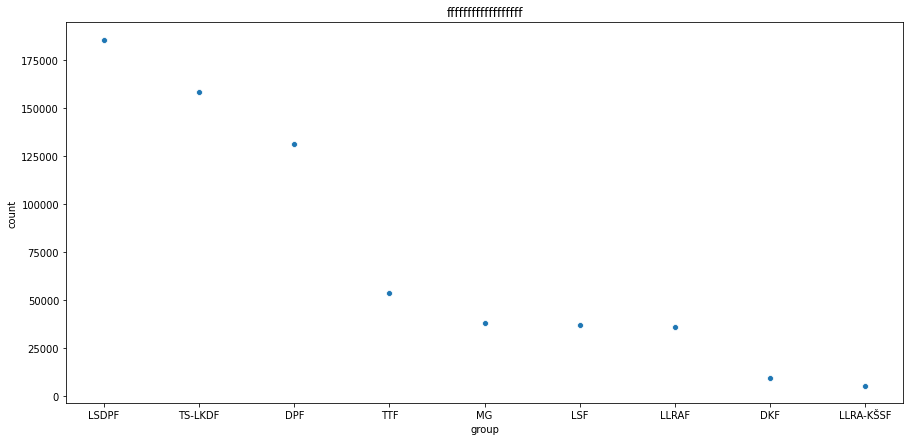

In [ ]:
##
df_scatter_1 = df.where(df['time_yyyy'] == '2017')
print(type(df_scatter_1))
df_scatter_1 = pd.DataFrame({'group':pagal_partijas12.index, 'count':pagal_partijas12.values})

print(df_scatter_1)
plt.figure(figsize=(15,7))
plt.title("ffffffffffffffffff")
plt.xlabel("dddddddddddddddd")
plt.ylabel("bbbbbbbbbbbbbbb")
sns.scatterplot(x=df_scatter_1['group'], y=df_scatter_1['count'])

#ax = sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

In [ ]:
df.head()

,voting_id,voter_id,time,group,voter,question,sitting_type,vote,n_eligible_voters,n_voters,time_yyyy_mm_dd,time_yyyy
2776668,210,7254,1997-10-28 11:12:40,SDF,Valatka Jonas,NaN,rytinis,1.0,136,114,1997-10-28,1997
2776895,214,155,1997-10-28 12:20:47,CF,Glaveckas Kęstutis,NaN,rytinis,1.0,136,67,1997-10-28,1997
2776896,214,101,1997-10-28 12:20:47,TSLK,Hofertienė Romualda,NaN,rytinis,-1.0,136,67,1997-10-28,1997
2776897,214,7266,1997-10-28 12:20:47,TSLK,Jackūnas Žibartas Juozas,NaN,rytinis,-1.0,136,67,1997-10-28,1997
2776898,214,107,1997-10-28 12:20:47,TSLK,Jarmolenko Vladimir,NaN,rytinis,1.0,136,67,1997-10-28,1997


In [ ]:
print(df_S_00.dtypes)

voting_id              int64
voter_id               int64
time                  object
group                 object
voter                 object
question              object
sitting_type          object
vote                 float64
n_eligible_voters      int64
n_voters               int64
time_yyyy_mm_dd       object
time_yyyy             object
dtype: object


In [ ]:
#df.dtypes
#print(type(df_S_00['time_yyyy_mm_dd'][2040244]))
#df['time_yyyy_mm_dd'] = pd.to_datetime(df['time_yyyy_mm_dd'])
#print(type(df_S_00['time_yyyy_mm_dd']))
#>>> df['Date'] =pd.to_datetime(df.Date)
#>>> df.sort('Date')